# Time series of chlorophyll data from different sensors

Great Lakes color producing agents (CPA) are derived from two different sensors.

As an example, we are going to plot time-series of mean chlorophyll a concentration from different sensors from 2002 to 2023.
We are going to download MODIS data (2002-2017) and VIIRS data (2018-2023).

First, let's load all the packages needed:

In [2]:
import urllib.request 
import xarray as xr 
import netCDF4 as nc

import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib.colors import LinearSegmentedColormap 

import warnings

warnings.filterwarnings('ignore')
 

##Get Lake Erie Monthly Average MODIS data 

Go to ERDDAP to find the name of the dataset for dailly MODIS data: LE_CHL_MODIS_Daily

You should always examine the dataset in ERDDAP to check the date range, names of the variables and dataset ID, to make sure your griddap calls are correct: 

https://apps.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.graph

- let's download data for Lake Erie:

In [3]:
# in Python code replace coastwatch.glerl.noaa.gov with apps.glerl.noaa.gov

url='https://apps.glerl.noaa.gov/erddap/griddap/LE_CHL_MODIS_Daily.nc?chlorophyll%5B(2002-08-07T19:05:00Z):1:(2017-10-22T18:00:00Z)%5D%5B(41.0051550293714):1:(42.9950003885447)%5D%5B(-83.4950003885448):1:(-78.505388156246)%5D'

In [4]:
urllib.request.urlretrieve(url, "e_chl_modis.nc")

('e_chl_modis.nc', <http.client.HTTPMessage at 0x1a2705704d0>)

#### - let's use xarray to extract the data from the downloaded file:

In [5]:
e_m_ds = xr.open_dataset('e_chl_modis.nc',decode_cf=False)

In [6]:
e_m_ds.coords

Coordinates:
  * time       (time) float64 1.029e+09 1.029e+09 ... 1.509e+09 1.509e+09
  * latitude   (latitude) float64 41.01 41.02 41.03 41.04 ... 42.98 42.99 43.0
  * longitude  (longitude) float64 -83.5 -83.49 -83.48 ... -78.53 -78.52 -78.51

In [7]:
e_m_ds.time.values

array([1.02874710e+09, 1.02883020e+09, 1.02891930e+09, 1.02900240e+09,
       1.02960750e+09, 1.02986850e+09, 1.03030170e+09, 1.03047360e+09,
       1.03064580e+09, 1.03081770e+09, 1.03090680e+09, 1.03125090e+09,
       1.03142310e+09, 1.03151190e+09, 1.03159500e+09, 1.03220010e+09,
       1.03228920e+09, 1.03263330e+09, 1.03323840e+09, 1.03341060e+09,
       1.03392660e+09, 1.03462080e+09, 1.05457950e+09, 1.05613410e+09,
       1.05673920e+09, 1.05708330e+09, 1.05717240e+09, 1.05812160e+09,
       1.05820470e+09, 1.05838260e+09, 1.05855480e+09, 1.05863790e+09,
       1.05907080e+09, 1.05950400e+09, 1.05958710e+09, 1.06028130e+09,
       1.06079730e+09, 1.06088640e+09, 1.06123050e+09, 1.06157460e+09,
       1.06166370e+09, 1.06200780e+09, 1.06226880e+09, 1.06278510e+09,
       1.06287390e+09, 1.06304610e+09, 1.06321800e+09, 1.06373430e+09,
       1.06382340e+09, 1.06408440e+09, 1.06416750e+09, 1.06554990e+09,
       1.06563870e+09, 1.06581090e+09, 1.06589400e+09, 1.09138230e+09,
      

In [8]:
e_m_ds.data_vars

Data variables:
    chlorophyll  (time, latitude, longitude) float64 ...

In [9]:
e_m_ds.chlorophyll.shape

(506, 200, 500)

The downloaded data contains only one variable: chlorophyll.

#### - Extract the dates corresponding to the data of each day:

In [10]:
e_m_dates=nc.num2date(e_m_ds.time,e_m_ds.time.units, only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
e_m_dates
#e_m_ds.time

array([real_datetime(2002, 8, 7, 19, 5),
       real_datetime(2002, 8, 8, 18, 10),
       real_datetime(2002, 8, 9, 18, 55),
       real_datetime(2002, 8, 10, 18, 0),
       real_datetime(2002, 8, 17, 18, 5),
       real_datetime(2002, 8, 20, 18, 35),
       real_datetime(2002, 8, 25, 18, 55),
       real_datetime(2002, 8, 27, 18, 40),
       real_datetime(2002, 8, 29, 18, 30),
       real_datetime(2002, 8, 31, 18, 15),
       real_datetime(2002, 9, 1, 19, 0),
       real_datetime(2002, 9, 5, 18, 35),
       real_datetime(2002, 9, 7, 18, 25),
       real_datetime(2002, 9, 8, 19, 5),
       real_datetime(2002, 9, 9, 18, 10),
       real_datetime(2002, 9, 16, 18, 15),
       real_datetime(2002, 9, 17, 19, 0),
       real_datetime(2002, 9, 21, 18, 35),
       real_datetime(2002, 9, 28, 18, 40),
       real_datetime(2002, 9, 30, 18, 30),
       real_datetime(2002, 10, 6, 17, 50),
       real_datetime(2002, 10, 14, 18, 40),
       real_datetime(2003, 6, 2, 18, 45),
       real_datetime(2003

In [11]:
e_m_ds.chlorophyll.attrs['_FillValue']

-999.0

In [12]:
# In chlorophyll array, replace -999 with nan
nan_e_m_ds_chlorophyll = e_m_ds.chlorophyll.where(e_m_ds.chlorophyll.values != e_m_ds.chlorophyll.attrs['_FillValue'])

#print(nan_e_m_ds_chlorophyll[0,100,:] )
print(nan_e_m_ds_chlorophyll)


<xarray.DataArray 'chlorophyll' (time: 506, latitude: 200, longitude: 500)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
       


#### - Compute the monthly mean over the region data :

In [31]:
# Create list of string contains 'year month day hours minutes seconds'
d_list = []
[ d_list.append(dt.strftime("%Y %m %d %H %M %S")) for dt in e_m_dates]

#print(min(d_list))
#print(max(d_list))

mn = '08'
yr = '2009'

i_list = []
for n, d in enumerate(d_list):
    d_t = d.split()
    if d_t[0] == yr and d_t[1] == mn:
        # print( n, d_t)
        i_list.append(n)  # get all index of data for yr and mn
    
    #print(n, d)
#print(i_list)

# axis=0 is time line
chl_avg_img = nan_e_m_ds_chlorophyll.values[i_list[0]:i_list[-1]].mean(axis=0)
print(chl_avg_img.shape)

(200, 500)


In [14]:
# find max and min value in chl_avg_img
print(np.nanmin(chl_avg_img))
print(np.nanmax(chl_avg_img))

0.4942583243052167
100.5


In [15]:
# number of colors
levs = np.arange(np.nanmin(chl_avg_img), np.nanmax(chl_avg_img), 0.3)
len(levs)

334

In [16]:
# init a color list
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]

cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))


#### -Draw the image of monthly mean

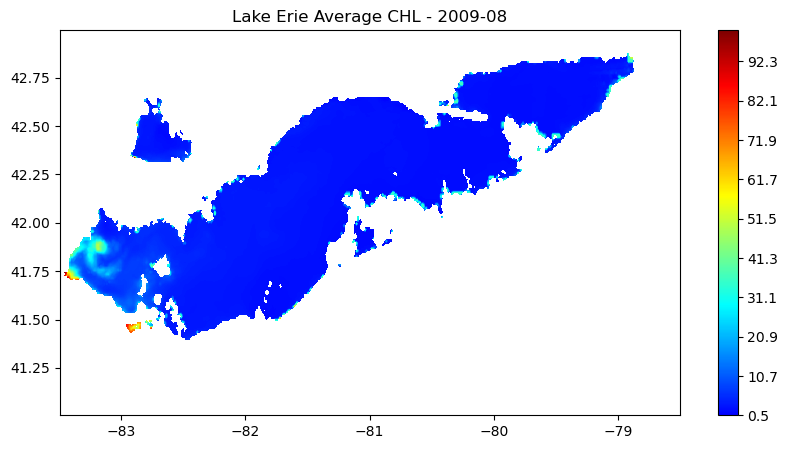

In [38]:
plt.subplots(figsize=(10, 5))

#plot image chl_avg_img
plt.contourf(e_m_ds.longitude, e_m_ds.latitude, chl_avg_img, levs,cmap=cm)

#plot the color scale
plt.colorbar()

#example of how to add points to the map
#plt.scatter(np.linspace(-82,-80.5,num=4),np.repeat(42,4),c='black')

#example of how to add a contour line
#step = np.arange(1,100, 10)
#plt.contour(e_m_ds.longitude, e_m_ds.latitude, chl_avg_img,levels=step,linewidths=1)
 
#plot title
plt.title("Lake Erie Average CHL - " + yr + '-' + mn)
plt.show()

#### -  Compute the Lake Erie chlorophyll monthly mean from 2002 to 2017

In [42]:
d_list = []
[ d_list.append(dt.strftime("%Y %m %d %H %M %S")) for dt in e_m_dates]

#print(min(d_list))
#print(max(d_list))
m_yr_list = []
[ m_yr_list.append(str(dt.year)) for dt in e_m_dates if str(dt.year) not in m_yr_list ]

print(m_yr_list)
print(len(m_yr_list))

mn_list = ['01','02','03','04','05','06','07','08','09','10','11','12']
m_chl_avg_list = []
for yr in m_yr_list:
    for mn in mn_list:
        
        i_list = []
        for n, d in enumerate(d_list):
            d_t = d.split()
            #print(type(yr), type(mn), d_t)
            if d_t[0] == yr and d_t[1] == mn:
                #print( n, d_t)
                i_list.append(n)  # get all index of data for yr and mn
    
        #print(i_list, 'aaa')

        if i_list:
            #print('bbb')
            # axis=0 is time line
            m_chl_avg = np.nanmean(nan_e_m_ds_chlorophyll.values[i_list[0]:i_list[-1]],axis=(0,1,2))
            #print(i_list)
            #print('ccc', chl_avg)
        else:
            m_chl_avg = np.NAN
        #print(yr, mn, chl_avg)
        
        m_chl_avg_list.append(m_chl_avg)  # add each month mean data into list
print(len(m_chl_avg_list))
print(m_chl_avg_list)

['2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
16
192
[nan, nan, nan, nan, nan, nan, nan, 5.435731696799938, 5.390267233342085, 8.081265781572409, nan, nan, nan, nan, nan, nan, nan, 6.781491128619841, 6.109469974086832, 4.314376310517935, 6.79798886383254, 7.093404713878546, nan, nan, nan, nan, nan, nan, nan, nan, nan, 5.368433526104296, 7.64127887019175, 10.885647119544341, nan, nan, nan, nan, nan, nan, nan, 5.840624163588643, 5.249259500793706, 4.616988228955723, 7.096526864254263, 4.819230418185895, nan, nan, nan, nan, nan, nan, nan, 4.510100122676393, 4.086877241390418, 8.282441959350821, nan, nan, nan, nan, nan, nan, nan, nan, nan, 6.047208513833891, 4.158334577045406, 5.306521407370655, 4.870477621191157, nan, nan, nan, nan, nan, nan, nan, nan, 4.399793136125678, 4.948825492811119, 6.928067277764852, 7.537945121660116, 10.463871652015316, nan, nan, nan, nan, nan, nan, nan, 5.468607769352359, 4.33143

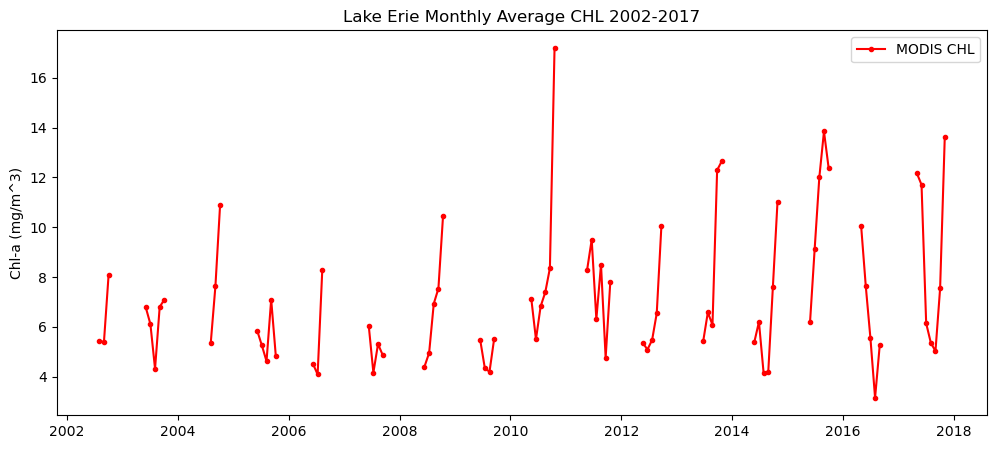

In [46]:
x = np.linspace(2002, 2018,num=192)   # contains data from 2002 to 2017 (not include 2018)
 
#units = e_m_ds.chlorophyll.attrs['units']

plt.figure(figsize=(12,5)) 
plt.plot(x,m_chl_avg_list,label='MODIS CHL',c='red',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.title("Lake Erie Monthly Average CHL " + m_yr_list[0] + '-' + m_yr_list[-1])
plt.legend()

## Get Lake Erie Dailly Average VIIRS data 

In [86]:
url2='https://apps.glerl.noaa.gov/erddap/griddap/LE_CHL_VIIRS_Daily.nc?Chlorophyll%5B(2023-01-04T18:47:05Z):1:(2023-12-28T18:32:33Z)%5D%5B(41.2690208353804):1:(43.017997272827)%5D%5B(-83.6574899492178):1:(-78.4429490894234)%5D'
urllib.request.urlretrieve(url2, "e_viirs_chl.nc")

('e_viirs_chl.nc', <http.client.HTTPMessage at 0x1a20d832610>)

In [87]:
e_v_ds = xr.open_dataset('e_viirs_chl.nc',decode_cf=False)

In [88]:
print(e_v_ds)

<xarray.Dataset>
Dimensions:      (time: 544, latitude: 271, longitude: 806)
Coordinates:
  * time         (time) float64 1.673e+09 1.673e+09 ... 1.704e+09 1.704e+09
  * latitude     (latitude) float64 41.27 41.28 41.28 ... 43.01 43.01 43.02
  * longitude    (longitude) float64 -83.66 -83.65 -83.64 ... -78.45 -78.44
Data variables:
    Chlorophyll  (time, latitude, longitude) float32 ...
Attributes: (12/34)
    cdm_data_type:                  Grid
    colorBarMaximum:                30.0
    colorBarMinimum:                1.0
    colorBarScale:                  Log
    Conventions:                    CF-1.6, COARDS, ACDD-1.3
    Easternmost_Easting:            -78.4429490894234
    ...                             ...
    summary:                        Color Producing Agent (CPA) Chlorophyll, ...
    testOutOfDate:                  now-18days
    time_coverage_end:              2023-12-28T18:32:33Z
    time_coverage_start:            2023-01-04T18:47:05Z
    title:                    

In [89]:
nan_e_v_ds_chlorophyll = e_v_ds.Chlorophyll.where(e_v_ds.Chlorophyll.values != e_v_ds.Chlorophyll.attrs['_FillValue'])

v_chl_avg = np.nanmean(nan_e_v_ds_chlorophyll,axis=(1,2))
#print(v_chl_avg)
#print(len(v_chl_avg))

In [90]:
e_v_dates=nc.num2date(e_v_ds.time,e_v_ds.time.units, only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
e_v_dates

array([real_datetime(2023, 1, 4, 18, 47, 5),
       real_datetime(2023, 1, 5, 18, 28, 10),
       real_datetime(2023, 1, 7, 17, 50, 19),
       real_datetime(2023, 1, 7, 19, 31, 19),
       real_datetime(2023, 1, 8, 19, 12, 23),
       real_datetime(2023, 1, 9, 17, 12, 27),
       real_datetime(2023, 1, 9, 17, 13, 53),
       real_datetime(2023, 1, 9, 18, 53, 28),
       real_datetime(2023, 1, 10, 18, 34, 32),
       real_datetime(2023, 1, 11, 18, 15, 36),
       real_datetime(2023, 1, 14, 17, 18, 51),
       real_datetime(2023, 1, 14, 18, 59, 52),
       real_datetime(2023, 1, 15, 16, 59, 56),
       real_datetime(2023, 1, 15, 17, 1, 21),
       real_datetime(2023, 1, 15, 18, 40, 56),
       real_datetime(2023, 1, 16, 18, 22),
       real_datetime(2023, 1, 17, 18, 3, 5),
       real_datetime(2023, 1, 19, 17, 25, 14),
       real_datetime(2023, 1, 19, 19, 6, 14),
       real_datetime(2023, 1, 24, 17, 31, 37),
       real_datetime(2023, 1, 24, 19, 12, 38),
       real_datetime(2023, 1, 

In [91]:
v_chl_avg = np.nanmean(nan_e_v_ds_chlorophyll.values,axis=(1,2))
v_chl_avg


array([ 3.8245378 , 17.05229   ,  0.77159315,  1.6202371 ,  2.068805  ,
        1.7207391 ,  2.0681734 ,  9.915978  , 12.000377  , 60.60568   ,
        2.9275532 , 15.261721  ,  2.1003587 ,  2.5391452 , 15.000816  ,
       18.150581  ,  4.041805  ,  5.558531  , 14.340515  ,  7.0143795 ,
       24.486782  , 10.351516  ,  9.925964  ,  8.393265  ,  7.0230336 ,
       19.298477  , 13.378698  , 17.380596  ,  8.412001  , 18.604963  ,
        9.874779  , 34.36881   ,  2.2588596 ,  3.6034255 ,  2.506503  ,
        7.9039016 , 28.500935  , 15.452688  , 18.463425  , 11.424103  ,
        8.926837  , 29.18119   , 15.104329  ,  7.305774  , 12.944991  ,
       28.979595  , 31.491842  , 17.951267  ,  4.4605803 , 14.379     ,
       28.11916   ,  9.264345  , 26.880186  , 46.661022  , 14.642408  ,
       13.05799   , 13.633649  ,  1.418521  , 13.829434  ,  5.444851  ,
       16.703632  , 20.848345  ,  5.0073376 , 43.061474  ,  4.4501486 ,
       10.821825  , 13.9933815 , 31.618942  , 18.309826  ,  0.62

<class 'numpy.ndarray'>
(544,)
(544,)


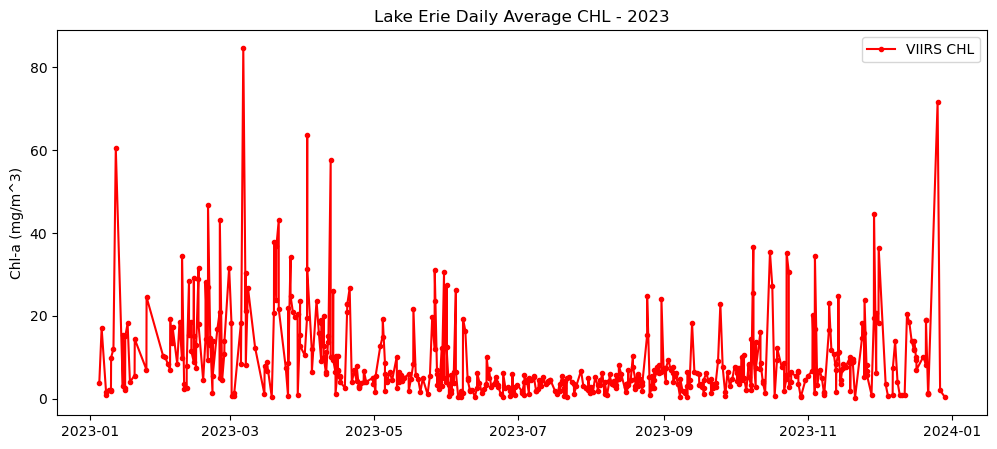

In [95]:
plt.figure(figsize=(12,5)) 
plt.plot(e_v_dates,v_chl_avg,label='VIIRS CHL',c='red',marker='.',linestyle='-')
plt.ylabel('Chl-a (mg/m^3)')
plt.title("Lake Erie Daily Average CHL - 2023")
plt.legend()
print(type(v_chl_avg))
print(v_chl_avg.shape)
print(e_v_dates.shape)

In [93]:
#e_v_ds.close()
!jupyter nbconvert --to html GL_python_tutorial2.ipynb

[NbConvertApp] Converting notebook GL_python_tutorial2.ipynb to html
[NbConvertApp] Writing 878306 bytes to GL_python_tutorial2.html
